In [1]:
import pandas as pd

In [2]:
import numpy as np

In [8]:
import seaborn as sns

In [6]:
data = pd.read_csv('./ERP000546_genecounts.txt',sep='\t',index_col=0)

In [12]:
corr = data.corr(method='spearman')

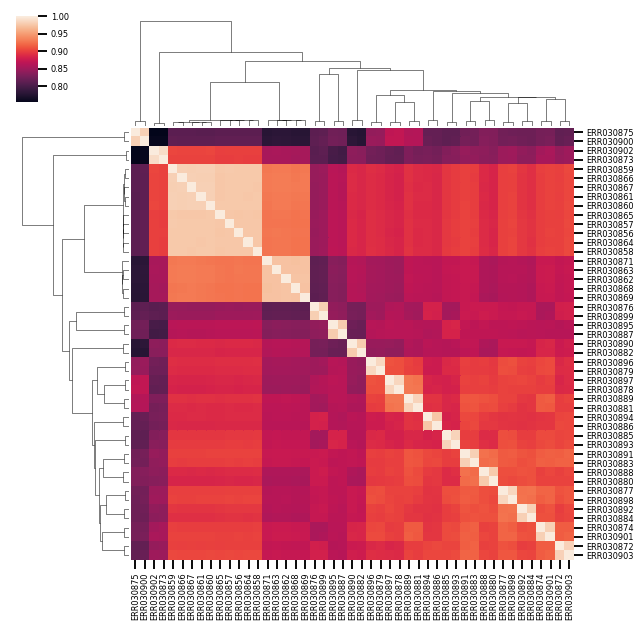

In [29]:
sns.set_context('talk',font_scale=.5)
sns.clustermap(data.corr(method='spearman'))

In [34]:
data.columns

Index(['ERR030872', 'ERR030903', 'ERR030902', 'ERR030873', 'ERR030877',
       'ERR030898', 'ERR030895', 'ERR030887', 'ERR030875', 'ERR030900',
       'ERR030864', 'ERR030865', 'ERR030857', 'ERR030858', 'ERR030856',
       'ERR030896', 'ERR030879', 'ERR030888', 'ERR030880', 'ERR030891',
       'ERR030883', 'ERR030892', 'ERR030884', 'ERR030889', 'ERR030881',
       'ERR030868', 'ERR030869', 'ERR030871', 'ERR030863', 'ERR030862',
       'ERR030890', 'ERR030882', 'ERR030897', 'ERR030878', 'ERR030859',
       'ERR030867', 'ERR030861', 'ERR030866', 'ERR030860', 'ERR030876',
       'ERR030899', 'ERR030885', 'ERR030893', 'ERR030894', 'ERR030886',
       'ERR030874', 'ERR030901'],
      dtype='object')

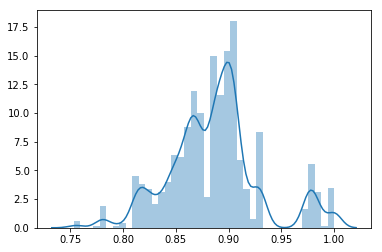

In [18]:
sns.distplot(corr.values.flatten())

In [20]:
from sklearn.decomposition import PCA

In [61]:
data = data.T

In [62]:
p = PCA(n_components=10)

In [63]:
data

,ERR030872,ERR030903,ERR030902,ERR030873,ERR030877,ERR030898,ERR030895,ERR030887,ERR030875,ERR030900,...,ERR030866,ERR030860,ERR030876,ERR030899,ERR030885,ERR030893,ERR030894,ERR030886,ERR030874,ERR030901
A1BG,136,106,70,61,105,117,25465,28135,164,188,...,1261,1497,15,11,55,48,16,27,71,70
A1BG-AS1,234,202,108,88,135,119,7943,11696,286,316,...,540,639,31,12,161,183,47,51,162,184
A1CF,9,10,11,11,0,0,15319,14473,7,0,...,663,704,11,16,1820,1858,4,1,0,0
A2M,26103,27397,58411,54123,103938,112669,320881,310560,268,284,...,60591,62834,16402,17996,54412,57717,70698,71916,41649,44368
A2M-AS1,2325,1264,3793,6902,9761,6364,21849,35963,108,88,...,5460,5552,1066,565,5631,3258,2422,3430,4809,2571
A2ML1,23,15,203,177,23,63,0,0,6,4,...,37,35,0,0,27,18,7,4,52,50
A2MP1,6,14,15,13,2,6,4,3,14,6,...,8,13,0,0,6,1,9,5,1,2
A3GALT2,0,5,4,1,0,0,0,0,0,0,...,2,1,0,0,1,3,1,0,2,1
A4GALT,830,877,1154,967,2075,2178,59,76,13,5,...,739,789,860,976,2034,2140,1204,1342,965,991
A4GNT,3,4,3,5,5,4,10,6,0,0,...,1,2,0,0,19,11,0,0,7,10


In [68]:
df = data.loc[[i for i in list(data.index) if '_' not in i]]

In [73]:
std_df = (df - df.mean())/df.std()

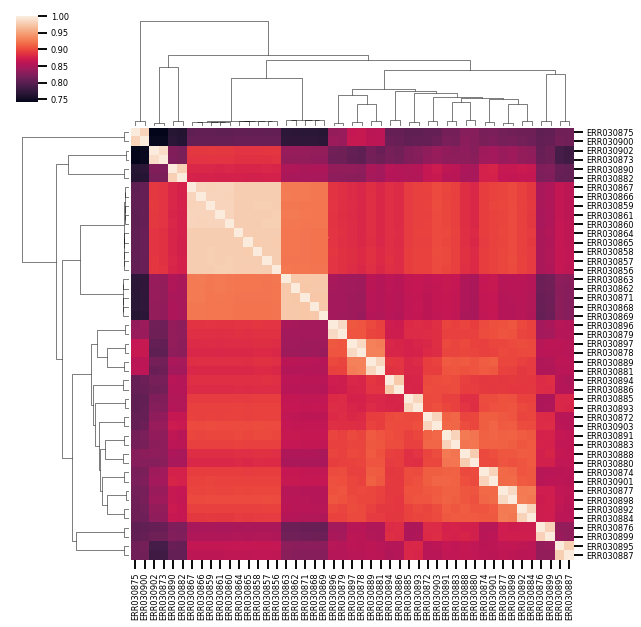

In [76]:
sns.clustermap(std_df.corr(method='spearman'))

In [77]:
std_df_corrs = std_df.corr(method='spearman')

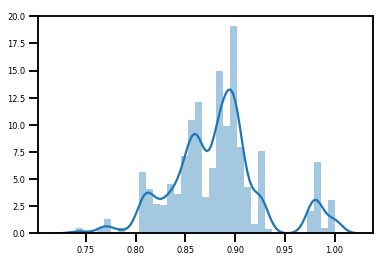

In [78]:
sns.distplot(std_df_corrs.values.flatten())

In [80]:
fit = p.fit(std_df)

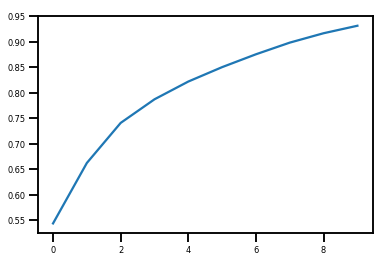

In [81]:
plt.plot(np.cumsum(fit.explained_variance_ratio_))

In [85]:
pca_two = PCA(2)

In [86]:
projected = pca_two.fit_transform(std_df)

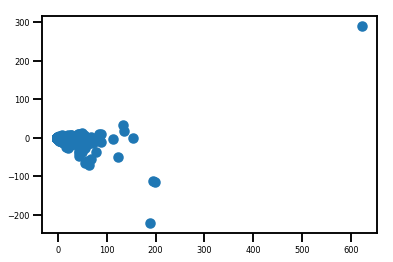

In [93]:
plt.scatter(projected[:,0],projected[:,1])